In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
 

In [2]:
df=pd.read_csv('/Users/ajaychaudhary/Downloads/Dataset .csv')

In [3]:
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


# Level :-1

## Task 1: Data Exploration and Preprocessing

### Explore the dataset and identify the number of rows and columns.

In [4]:
# check data rows and columns.
df.shape

(9551, 21)

### Check for missing values in each column and handle them accordingly.

In [5]:
# check missing values and handle them.
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [6]:
# Impute missing values in the 'Cuisines' column with the most frequent cuisine
most_frequent_cuisine = df['Cuisines'].mode()[0]
df['Cuisines'].fillna(most_frequent_cuisine, inplace=True)

# Check if there are still any missing values
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


### Perform data type conversion if necessary. Analyze the distribution of the target variable ("Aggregate rating") and identify any class imbalances.

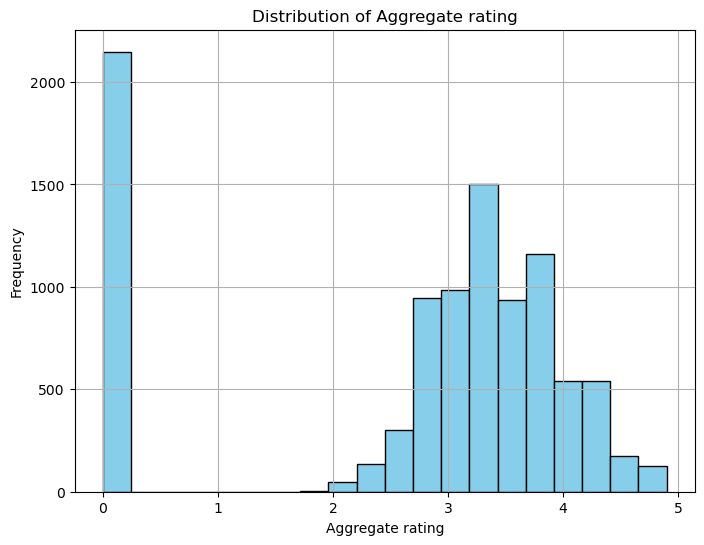

In [7]:
# Visualize the distribution of Aggregate rating
plt.figure(figsize=(8, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Aggregate rating')
plt.xlabel('Aggregate rating')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Task 2:- Descriptive Analysis

### Calculate basic statistical measures (mean, median, standard deviation, etc.) for numerical columns.

In [8]:
# check basic statistical measures.
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


### Explore the distribution of categorical variables like "Country Code, " "City," and "Cuisines.

In [9]:
# Distribution of Country Code
country_distribution = df['Country Code'].value_counts()
print("Country Distribution:")
print(country_distribution)

Country Distribution:
1      8652
216     434
215      80
30       60
214      60
189      60
148      40
208      34
14       24
162      22
94       21
184      20
166      20
191      20
37        4
Name: Country Code, dtype: int64


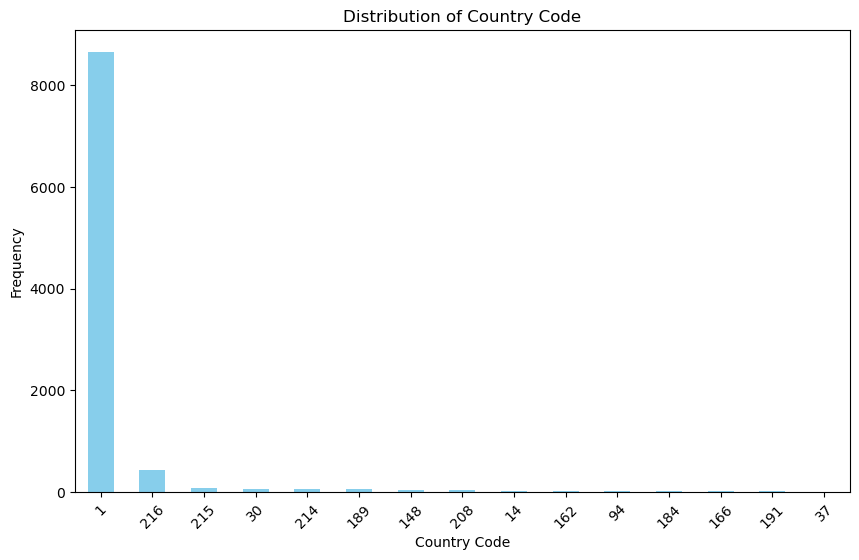

In [10]:
# Plotting the distribution of Country Code
plt.figure(figsize=(10, 6))
country_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Country Code')
plt.xlabel('Country Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [11]:
# Distribution of City
city_distribution = df['City'].value_counts()
print("\nCity Distribution:")
print(city_distribution)


City Distribution:
New Delhi           5473
Gurgaon             1118
Noida               1080
Faridabad            251
Ghaziabad             25
                    ... 
Panchkula              1
Mc Millan              1
Mayfield               1
Macedon                1
Vineland Station       1
Name: City, Length: 141, dtype: int64


### Identify the top cuisines and cities with the highest number of restaurants.

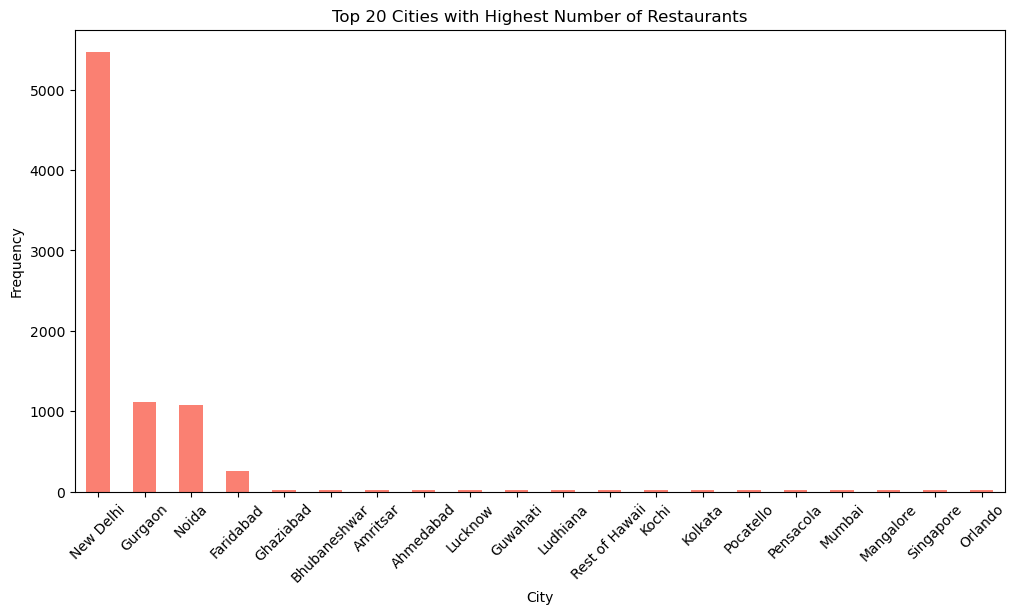

In [12]:
# Plotting the distribution of City
plt.figure(figsize=(12, 6))
city_distribution.head(20).plot(kind='bar', color='salmon')
plt.title('Top 20 Cities with Highest Number of Restaurants')
plt.xlabel('City')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [13]:
# Splitting cuisines and creating a list of all unique cuisines
all_cuisines = df['Cuisines'].str.split(', ').explode().dropna()
cuisine_distribution = all_cuisines.value_counts()
print("\nCuisine Distribution:")
print(cuisine_distribution)


Cuisine Distribution:
North Indian      3969
Chinese           2735
Fast Food         1986
Mughlai            995
Italian            764
                  ... 
Fish and Chips       1
Malwani              1
Cuisine Varies       1
Mineira              1
B�_rek               1
Name: Cuisines, Length: 145, dtype: int64


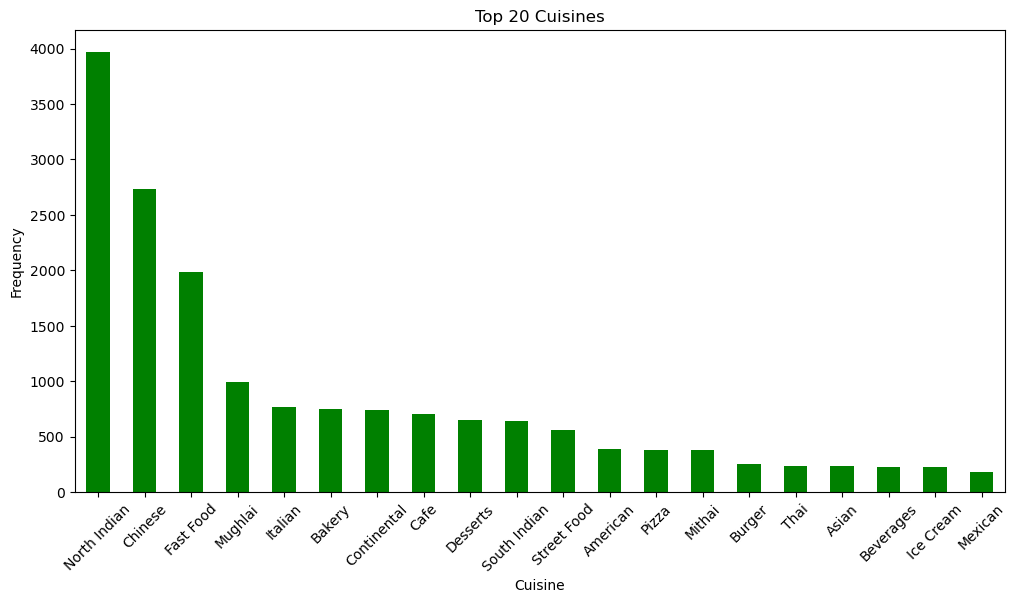

In [14]:
# Plotting the distribution of Cuisines
plt.figure(figsize=(12, 6))
cuisine_distribution.head(20).plot(kind='bar', color='green')
plt.title('Top 20 Cuisines')
plt.xlabel('Cuisine')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [15]:
# Count the occurrences of each cuisine and city
cuisine_counts = df['Cuisines'].str.split(', ').explode().value_counts()
city_counts = df['City'].value_counts()

# Identify the top cuisines and cities with the highest number of restaurants
top_cuisines = cuisine_counts.head(10)
top_cities = city_counts.head(10)

# Print the top cuisines and cities
print("Top 10 Cuisines:")
print(top_cuisines)

print("\nTop 10 Cities with Highest Number of Restaurants:")
print(top_cities)

Top 10 Cuisines:
North Indian    3969
Chinese         2735
Fast Food       1986
Mughlai          995
Italian          764
Bakery           745
Continental      736
Cafe             703
Desserts         653
South Indian     636
Name: Cuisines, dtype: int64

Top 10 Cities with Highest Number of Restaurants:
New Delhi       5473
Gurgaon         1118
Noida           1080
Faridabad        251
Ghaziabad         25
Bhubaneshwar      21
Amritsar          21
Ahmedabad         21
Lucknow           21
Guwahati          21
Name: City, dtype: int64


## Task 3: Geospatial Analysis

In [16]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

### Determine if there is any correlation between the restaurant's location and its rating.

In [71]:
# Perform one-hot encoding for location data (e.g., cities)
location_encoding = pd.get_dummies(df['City'])

# Concatenate the encoded location data with the original dataset
data_encoded = pd.concat([df, location_encoding], axis=1)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Extract the correlation between location and rating
location_rating_correlation = correlation_matrix['Aggregate rating']

print("Correlation between location and rating:")
print(location_rating_correlation)


/var/folders/03/24l9l0qj75bd3r5zk_j82v6h0000gn/T/ipykernel_1407/752485580.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_encoded.corr()


Correlation between location and rating:
Restaurant ID          -0.326212
Country Code            0.282189
Longitude              -0.116818
Latitude                0.000516
Average Cost for two    0.051792
                          ...   
Weirton                 0.008325
Wellington City         0.047843
Winchester Bay          0.003601
Yorkton                 0.004276
��stanbul               0.041098
Name: Aggregate rating, Length: 151, dtype: float64


# Level:- 2

## Task 1: Table Booking and Online Delivery

### Determine the percentage of restaurants that offer table booking and online delivery.

In [17]:
df['Has Table booking'].value_counts()

No     8393
Yes    1158
Name: Has Table booking, dtype: int64

In [19]:
percentage_has_booking = (df['Has Table booking'].value_counts(normalize=True) * 100).round(2)
print(percentage_has_booking)

No     87.88
Yes    12.12
Name: Has Table booking, dtype: float64


In [20]:
df['Has Online delivery'].value_counts()

No     7100
Yes    2451
Name: Has Online delivery, dtype: int64

In [21]:
percentage_has_delivery = (df['Has Online delivery'].value_counts(normalize=True) * 100).round(2)
print(percentage_has_delivery)


No     74.34
Yes    25.66
Name: Has Online delivery, dtype: float64


### Compare the average ratings of restaurants with table booking and those without.

In [22]:
average_rating_with_booking = df[df['Has Table booking'] == 'Yes']['Aggregate rating'].mean()
average_rating_without_booking = df[df['Has Table booking'] == 'No']['Aggregate rating'].mean()

print("Average rating with table booking:", average_rating_with_booking)
print("Average rating without table booking:", average_rating_without_booking)


Average rating with table booking: 3.4419689119170984
Average rating without table booking: 2.559358989634219


### Analyze the availability of online delivery among restaurants with different price ranges.

In [54]:
# Grouping the data by price range and calculating the percentage of restaurants with online delivery
availability_by_price_range = df.groupby('Price range')['Has Online delivery'].value_counts(normalize=True) * 100

print(availability_by_price_range)


Price range  Has Online delivery
1            No                     84.225923
             Yes                    15.774077
2            No                     58.689367
             Yes                    41.310633
3            No                     70.809659
             Yes                    29.190341
4            No                     90.955631
             Yes                     9.044369
Name: Has Online delivery, dtype: float64


## Task 2: Price Range Analysis

### Determine the most common price range among all the restaurants.

In [48]:
# Count the frequency of each price range
price_range_counts = df['Price range'].value_counts()

# Identify the most common price range
most_common_price_range = price_range_counts.idxmax()

print("The most common price range among all the restaurants is:", most_common_price_range)


The most common price range among all the restaurants is: 1


### Calculate the average rating for each price range.

In [49]:
# Group data by price range and calculate mean rating for each group
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

print(average_rating_by_price_range)


   Price range  Aggregate rating
0            1          1.999887
1            2          2.941054
2            3          3.683381
3            4          3.817918


### Identify the color that represents the highest average rating among different price ranges.

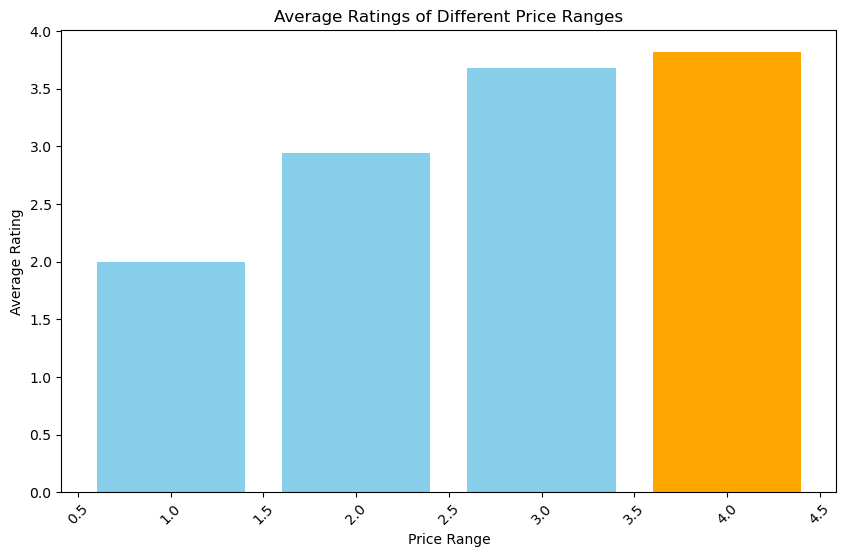

In [51]:
# Group data by price range and calculate mean rating for each group
average_rating_by_price_range = df.groupby('Price range')['Aggregate rating'].mean().reset_index()

# Sort price ranges by average rating in descending order
average_rating_by_price_range = average_rating_by_price_range.sort_values(by='Aggregate rating', ascending=False)

# Get the price range with the highest average rating
highest_rating_price_range = average_rating_by_price_range.iloc[0]['Price range']

# Define colors for each price range
colors = ['skyblue' if price_range != highest_rating_price_range else 'orange' for price_range in average_rating_by_price_range['Price range']]

# Plot the average ratings of different price ranges
plt.figure(figsize=(10, 6))
plt.bar(average_rating_by_price_range['Price range'], average_rating_by_price_range['Aggregate rating'], color=colors)
plt.xlabel('Price Range')
plt.ylabel('Average Rating')
plt.title('Average Ratings of Different Price Ranges')
plt.xticks(rotation=45)
plt.show()


### Calculate the average rating for each price range.

Top 5 Most Popular Cuisines based on Number of Votes:
                   Cuisines  Votes
1514  North Indian, Mughlai  53747
1306           North Indian  48967
1329  North Indian, Chinese  42012
331                    Cafe  30657
497                 Chinese  21925


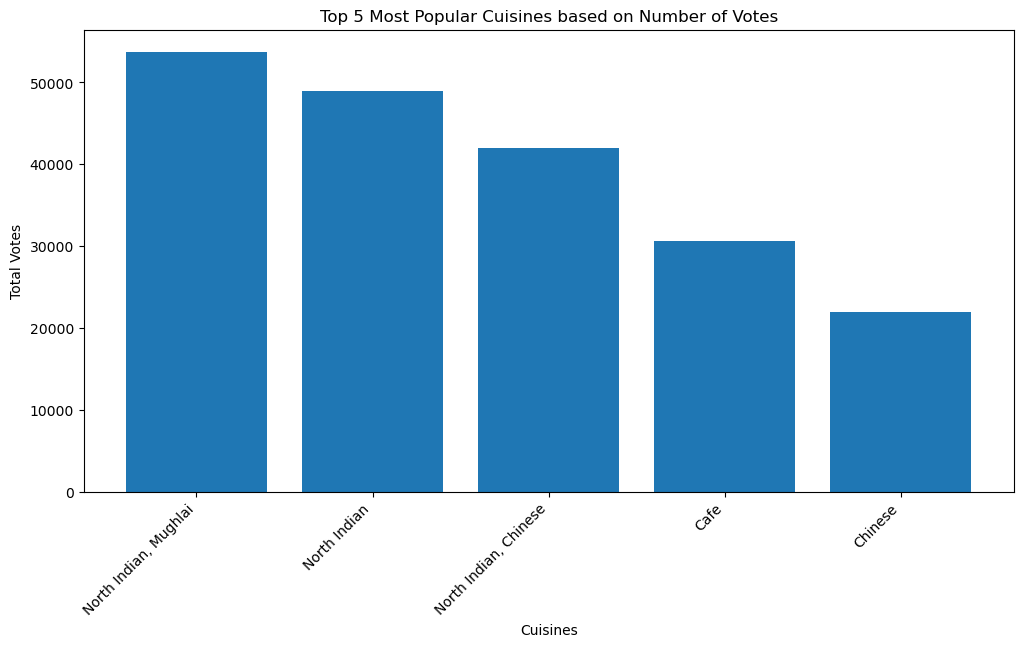

In [89]:

# Group data by cuisine type and sum the votes for each cuisine
votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort cuisines by total votes in descending order
popular_cuisines = votes_by_cuisine.sort_values(by='Votes', ascending=False)

# Print the top 5 most popular cuisines
print("Top 5 Most Popular Cuisines based on Number of Votes:")
print(popular_cuisines.head())

# Visualize the top cuisines using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(popular_cuisines['Cuisines'][:5], popular_cuisines['Votes'][:5])
plt.xlabel('Cuisines')
plt.ylabel('Total Votes')
plt.title('Top 5 Most Popular Cuisines based on Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.show()


## Task 3: Feature Engineering

### Extract additional features from the existing columns, such as the length of the restaurant name or address.

In [56]:
# Extract additional features: length of restaurant name and address
df['name_length'] = df['Restaurant Name'].apply(lambda x: len(x))
df['address_length'] = df['Address'].apply(lambda x: len(x))

# Display the updated DataFrame with additional features
print(df.head())


   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

### Create new features like "Has Table Booking" or "Has Online Delivery" by encoding categorical variables.

In [71]:
ajay=df.drop(['Address', 'Locality','Restaurant Name','City','Locality Verbose','Switch to order menu','Currency','Rating text','Cuisines'],axis='columns')

In [72]:
ajay

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Has Table booking,Has Online delivery,Is delivering now,Price range,Aggregate rating,Rating color,Votes
0,6317637,162,121.027535,14.565443,1100,Yes,No,No,3,4.8,Dark Green,314
1,6304287,162,121.014101,14.553708,1200,Yes,No,No,3,4.5,Dark Green,591
2,6300002,162,121.056831,14.581404,4000,Yes,No,No,4,4.4,Green,270
3,6318506,162,121.056475,14.585318,1500,No,No,No,4,4.9,Dark Green,365
4,6314302,162,121.057508,14.584450,1500,Yes,No,No,4,4.8,Dark Green,229
...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,No,No,No,3,4.1,Green,788
9547,5908749,208,29.041297,41.009847,105,No,No,No,3,4.2,Green,1034
9548,5915807,208,29.034640,41.055817,170,No,No,No,4,3.7,Yellow,661
9549,5916112,208,29.036019,41.057979,120,No,No,No,4,4.0,Green,901


In [73]:
vijay=pd.get_dummies(ajay,columns=['Has Table booking','Has Online delivery','Is delivering now','Rating color'],drop_first=True)

In [74]:
vijay

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow
0,6317637,162,121.027535,14.565443,1100,3,4.8,314,1,0,0,0,0,0,0,0
1,6304287,162,121.014101,14.553708,1200,3,4.5,591,1,0,0,0,0,0,0,0
2,6300002,162,121.056831,14.581404,4000,4,4.4,270,1,0,0,1,0,0,0,0
3,6318506,162,121.056475,14.585318,1500,4,4.9,365,0,0,0,0,0,0,0,0
4,6314302,162,121.057508,14.584450,1500,4,4.8,229,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,208,28.977392,41.022793,80,3,4.1,788,0,0,0,1,0,0,0,0
9547,5908749,208,29.041297,41.009847,105,3,4.2,1034,0,0,0,1,0,0,0,0
9548,5915807,208,29.034640,41.055817,170,4,3.7,661,0,0,0,0,0,0,0,1
9549,5916112,208,29.036019,41.057979,120,4,4.0,901,0,0,0,1,0,0,0,0


# Level  :- 3

## Task 1: Predictive Modeling

### Split the dataset into training and testing sets and evaluate the model's performance using appropriate metrics.

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


# Split the data into features and target variable
X = vijay.drop(columns=['Aggregate rating'])  # Features
y = vijay['Aggregate rating']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [76]:
X_train.head(2)

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Votes,Has Table booking_Yes,Has Online delivery_Yes,Is delivering now_Yes,Rating color_Green,Rating color_Orange,Rating color_Red,Rating color_White,Rating color_Yellow
1115,8417,1,77.306073,28.472912,1900,3,56,1,0,0,0,1,0,0,0
7633,301912,1,77.039089,28.621372,100,1,4,0,0,0,0,1,0,0,0


### Experiment with different algorithms (e.g., linear regression, decision trees, random forest) and compare their performance.

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
 
# Initialize and train the models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {name}")
    print("Mean Squared Error (MSE):", mse)
    print("Root Mean Squared Error (RMSE):", rmse)
    print("R-squared (R2) Score:", r2)
    print("\n")


Model: Linear Regression
Mean Squared Error (MSE): 0.030914853966756393
Root Mean Squared Error (RMSE): 0.17582620386835515
R-squared (R2) Score: 0.9864176741542799


Model: Decision Tree
Mean Squared Error (MSE): 0.05198848770277341
Root Mean Squared Error (RMSE): 0.22800984124106005
R-squared (R2) Score: 0.9771590517307766


Model: Random Forest
Mean Squared Error (MSE): 0.02839232391418101
Root Mean Squared Error (RMSE): 0.16850021932977122
R-squared (R2) Score: 0.9875259383293765




## Task 2: Customer Preference Analysis

### Determine if there are any specific cuisines that tend to receive higher ratings.

Top 5 Cuisines with the Highest Mean Rating:
                     Cuisines  Aggregate rating
1062            Italian, Deli               4.9
949         Hawaiian, Seafood               4.9
93    American, Sandwich, Tea               4.9
683       Continental, Indian               4.9
796   European, Asian, Indian               4.9


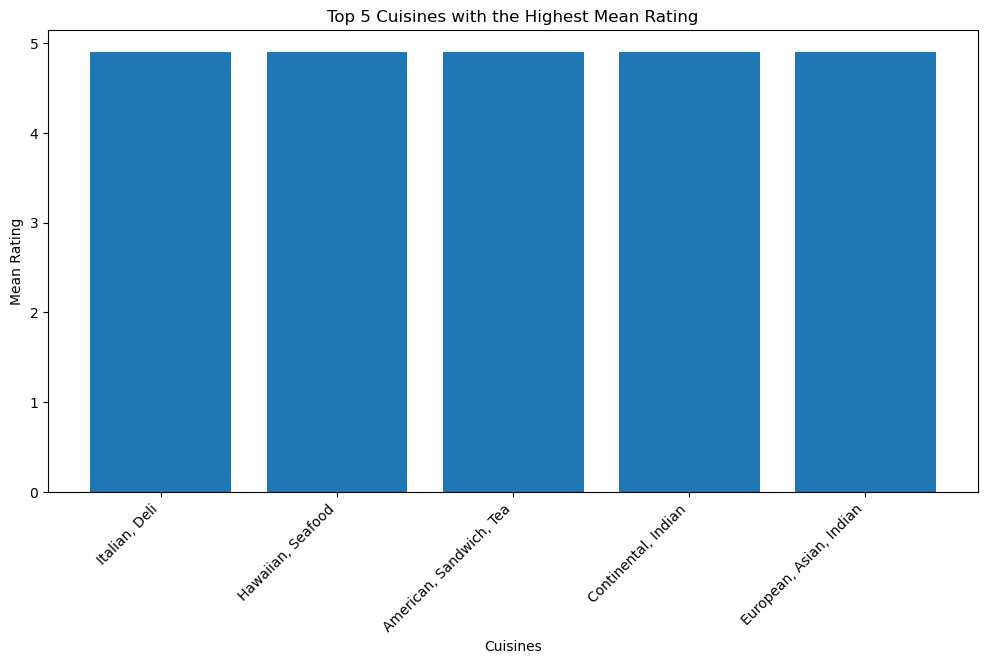

In [24]:
# Group data by cuisine type and calculate mean rating for each cuisine
mean_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().reset_index()

# Sort cuisines by mean rating in descending order
sorted_cuisines = mean_rating_by_cuisine.sort_values(by='Aggregate rating', ascending=False)

# Print the top 5 cuisines with the highest mean rating
print("Top 5 Cuisines with the Highest Mean Rating:")
print(sorted_cuisines.head())

# Visualize the mean ratings for different cuisines using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(sorted_cuisines['Cuisines'][:5], sorted_cuisines['Aggregate rating'][:5])
plt.xlabel('Cuisines')
plt.ylabel('Mean Rating')
plt.title('Top 5 Cuisines with the Highest Mean Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


### Identify the most popular cuisines among customers based on the number of votes.

Top 5 Most Popular Cuisines based on Number of Votes:
                   Cuisines  Votes
1514  North Indian, Mughlai  53747
1306           North Indian  48967
1329  North Indian, Chinese  42012
331                    Cafe  30657
497                 Chinese  21925


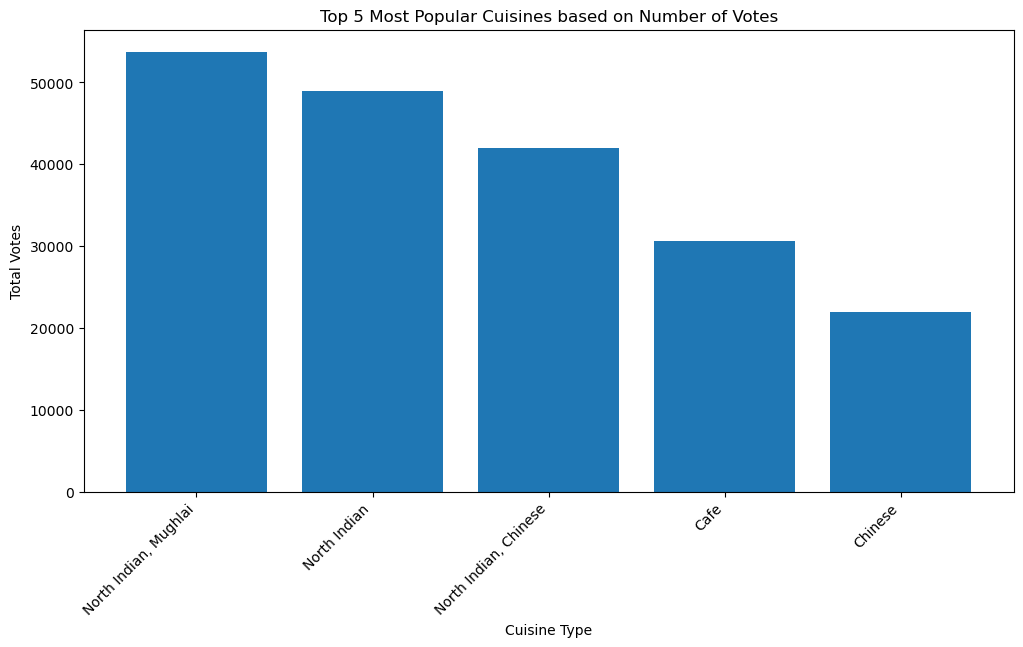

In [26]:
 # Group data by cuisine type and sum the votes for each cuisine
votes_by_cuisine = df.groupby('Cuisines')['Votes'].sum().reset_index()

# Sort cuisines by total votes in descending order
popular_cuisines = votes_by_cuisine.sort_values(by='Votes', ascending=False)

# Print the top 5 most popular cuisines
print("Top 5 Most Popular Cuisines based on Number of Votes:")
print(popular_cuisines.head())

# Visualize the top cuisines using a bar plot
plt.figure(figsize=(12, 6))
plt.bar(popular_cuisines['Cuisines'][:5], popular_cuisines['Votes'][:5])
plt.xlabel('Cuisine Type')
plt.ylabel('Total Votes')
plt.title('Top 5 Most Popular Cuisines based on Number of Votes')
plt.xticks(rotation=45, ha='right')
plt.show()


## Task 3: Data Visualization

### Create visualizations to represent the distribution of ratings using different charts (histogram, bar plot, etc.).

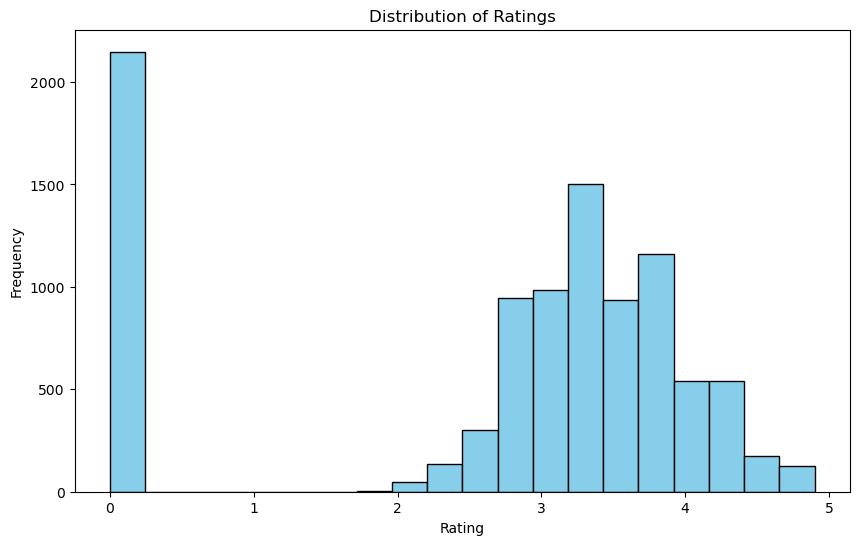

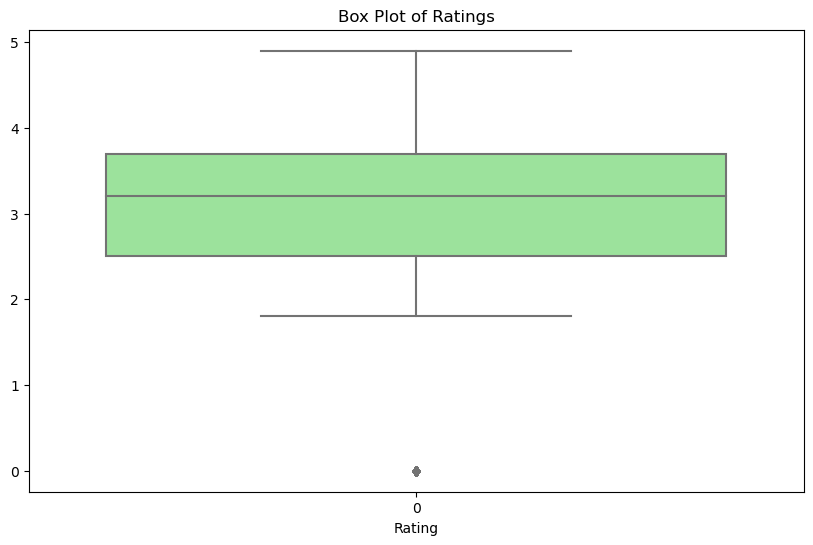

In [36]:

# Create a histogram to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
plt.hist(df['Aggregate rating'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

# Create a box plot to visualize the distribution of ratings
plt.figure(figsize=(10, 6))
sns.boxplot(df['Aggregate rating'], color='lightgreen')
plt.xlabel('Rating')
plt.title('Box Plot of Ratings')
plt.show()


### Visualize the relationship between various features and the target variable to gain insights.

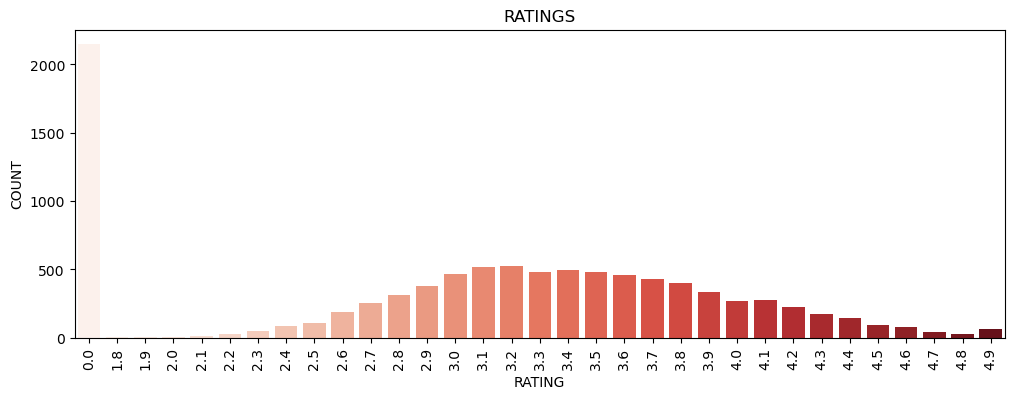

In [40]:
rating = df.groupby(["Aggregate rating", "Rating color", "Rating text"]).size().reset_index().rename(columns = {0: "Rating Count"})
plt.figure(figsize = (12, 4))
sns.barplot(x = "Aggregate rating", y = "Rating Count", data = rating, palette = "Reds")
plt.xticks(rotation = 90)
plt.title("RATINGS")
plt.xlabel("RATING")
plt.ylabel("COUNT")
plt.show()

Based on the chart provided, customers typically give ratings ranging from 2.8 to 4.1 on average.

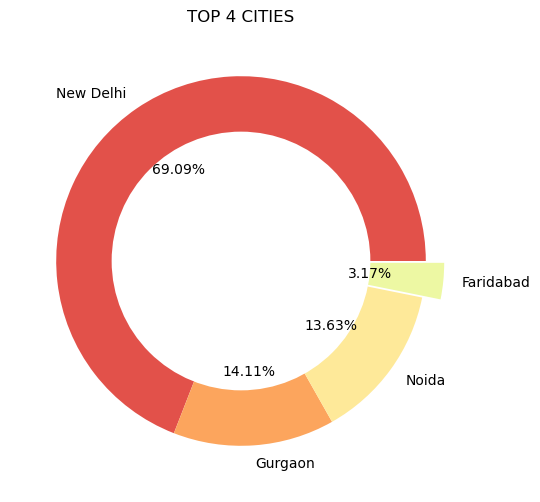

In [42]:
cities = df["City"].value_counts().index[:4]
orders = df["City"].value_counts().values[:4]
centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
plt.figure(figsize = (8,6))
plt.pie(orders, labels = cities,
        autopct = "%1.2f%%",
        explode = [0,0,0,0.1],
        colors = sns.color_palette("Spectral"))
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title("TOP 4 CITIES")
plt.show()

New Delhi, a city in India, stands out as the top location for Zomato orders, boasting the highest number of transactions.